In [74]:
 # Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [75]:
 # Import our data into pandas from CSV
file_name1 = os.path.join("raw_data","city_data.csv" )
file_name2 = os.path.join("raw_data","ride_data.csv" )

city_data_df = pd.read_csv(file_name1)
ride_data_df = pd.read_csv(file_name2)

In [76]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [77]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [78]:
#merge 2 dataframes together
combined_data = pd.merge(city_data_df, ride_data_df, how="inner", on="city")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [79]:
#citycity_df = combined_data.set_index("city")
#citycity_df.head()

In [80]:
#average fair per city
city_fare = combined_data.groupby(['city']).fare.mean()
city_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [81]:
#number of rides per city

city_rides = combined_data.groupby('city').date.count()
city_rides.head()



city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: date, dtype: int64

In [82]:
#Drivers per city
city_drivers = combined_data.groupby('city').driver_count.mean()
city_drivers.head()


city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [83]:
#Make a new table
Scatter_Table = pd.DataFrame({"Average fair per city": city_fare,
              "Rides per City": city_rides,
              "Drivers per City": city_drivers, 
             })
Scatter_Table.head()

,Average fair per city,Drivers per City,Rides per City
city,,,
Alvarezhaven,23.928710,21,31
Alyssaberg,20.609615,67,26
Anitamouth,37.315556,16,9
Antoniomouth,23.625000,21,22
Aprilchester,21.981579,49,19


In [84]:
Scatter_Table.to_csv("Scatter_Table.csv")

In [85]:
file_name3 = os.path.join("Scatter_Table.csv" )

Scatter_Table_df = pd.read_csv(file_name3)

In [86]:
Scatter_Table_df.head()

,city,Average fair per city,Drivers per City,Rides per City
0,Alvarezhaven,23.928710,21,31
1,Alyssaberg,20.609615,67,26
2,Anitamouth,37.315556,16,9
3,Antoniomouth,23.625000,21,22
4,Aprilchester,21.981579,49,19


In [87]:
Big_Table = pd.merge(Scatter_Table_df, city_data_df, on="city")
Big_Table.head()

,city,Average fair per city,Drivers per City,Rides per City,driver_count,type
0,Alvarezhaven,23.928710,21,31,21,Urban
1,Alyssaberg,20.609615,67,26,67,Urban
2,Anitamouth,37.315556,16,9,16,Suburban
3,Antoniomouth,23.625000,21,22,21,Urban
4,Aprilchester,21.981579,49,19,49,Urban


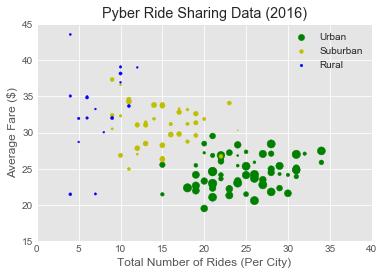

In [88]:
Urban = Big_Table[Big_Table["type"] == "Urban"]
x = Urban['Rides per City']
y = Urban["Average fair per city"]
s = Urban["Drivers per City"]
plt.scatter(x,y,s, c='g', label= 'Urban')

Suburban = Big_Table[Big_Table["type"] == "Suburban"]
x2 = Suburban['Rides per City']
y2 = Suburban["Average fair per city"]
s = Suburban["Drivers per City"]
plt.scatter(x2,y2,s, c='y', label= 'Suburban')

Rural = Big_Table[Big_Table["type"] == "Rural"]
x3 = Rural['Rides per City']
y3 = Rural["Average fair per city"]
s = Rural["Drivers per City"]
plt.scatter(x3,y3,s, c='b', label= 'Rural')

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend()
plt.style.use('ggplot')
plt.grid(True)
plt.xlim(0, 40)
plt.ylim(15, 45)
plt.rcParams['lines.linewidth']
plt.rcParams["figure.figsize"]


plt.savefig('Pyber Ride Sharing Data')
plt.show()

In [89]:
#% of Total FAre by City Type
Total_sum = combined_data['fare'].sum()

Total_Type = combined_data.groupby(['type']).fare.sum()

TFCT = (Total_Type/Total_sum)*100
TFCT

type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: fare, dtype: float64

In [90]:
 # Dataset Total Fare by City type
types = ["Rural", "Suburban", "Urban",]
fare = [6.6, 31.4, 62.0]
colors = ["yellowgreen", "red", "lightskyblue"]
explode = (0, 0, 0.05)

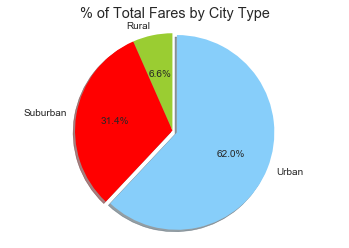

In [91]:
plt.title("% of Total Fares by City Type")
plt.pie(fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

plt.savefig('% of Total Fares by City Type')
plt.show()

In [92]:
#% of Total Rides by City Type
Total_Rides = combined_data['date'].count()

Total_RidesType = combined_data.groupby(['type']).date.count()

Rides = (Total_RidesType/Total_Rides)*100
Rides

type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: date, dtype: float64

In [93]:
 # Dataset Total Rides by City type
types = ["Rural", "Suburban", "Urban",]
rides = [5.2, 27.3, 67.5]
colors = ["yellowgreen", "red", "lightskyblue"]
explode = (0, 0, 0.05)

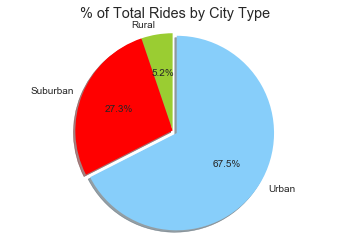

In [94]:
plt.title("% of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

plt.savefig('% of Total Rides by City Type')
plt.show()

In [95]:
#% of Total Drivers by City Type
Total_Drivers = city_data_df['driver_count'].sum()

Total_DriversType = city_data_df.groupby(['type']).driver_count.sum()

Drives = (Total_DriversType/Total_Drivers)*100
Drives

type
Rural        3.105405
Suburban    19.050463
Urban       77.844133
Name: driver_count, dtype: float64

In [96]:
 # Dataset Total Drivers by City type
types = ["Rural", "Suburban", "Urban",]
drivers = [3.1, 19.0, 77.8]
colors = ["yellowgreen", "red", "lightskyblue"]
explode = (0, 0, 0.05)

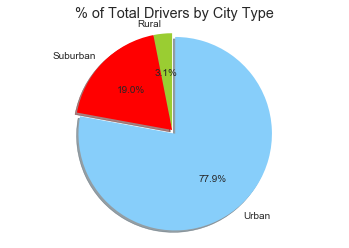

In [97]:
plt.title("% of Total Drivers by City Type")
plt.pie(drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

plt.savefig('% of Total Drivers by City Type')
plt.show()